In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import torch
from PIL import Image



# Add the path to the 'model' folder (or wherever your 'my_unet_model.py' is located)
# Use the current working directory to get the model folder
sys.path.append(os.path.join(os.getcwd(), 'model'))
sys.path.append(os.path.join(os.getcwd(), 'dataset'))
sys.path.append(os.path.join(os.getcwd(), 'visualization'))


# Import the UNet class
from my_unet_model import UNet
from view_result import visual3
import preprocessing



In [12]:
# Ricrea il modello
model = UNet(1,4,1)

# Specify the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and map it to the GPU
model.load_state_dict(torch.load("model_weights.pth", map_location=device))
model.eval()  # Imposta il modello in modalità di valutazione

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): 

In [6]:
# Specify the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and map it to the GPU
model = torch.load("model_full.pth", map_location=device)

# Set the model to evaluation mode
model.eval()

print("Model loaded onto", device)

Model loaded onto cpu


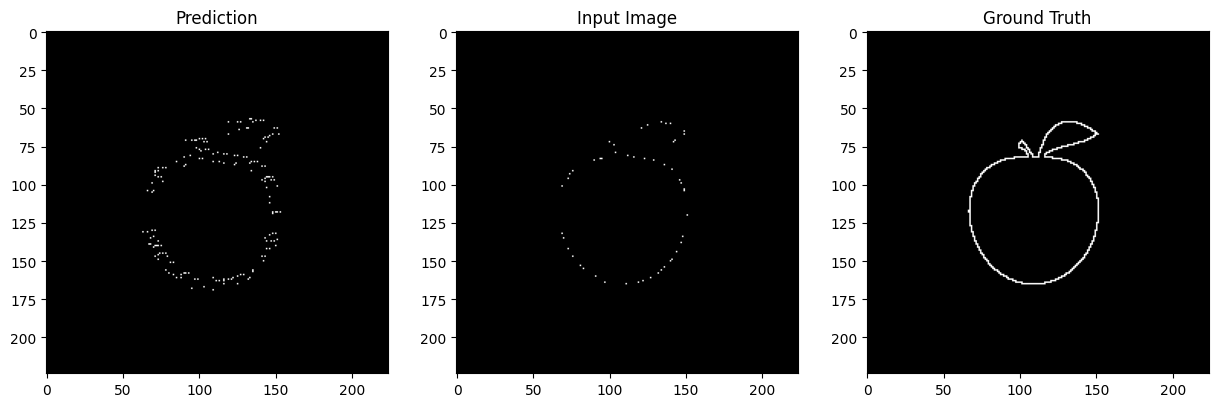

TypeError: cross_entropy_loss(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [7]:
# Load the test image
image_path = r"C:\Users\iacop\Desktop\Programmazione\Github\tum-adlr-11\data\55_surface.png"
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = np.array(image)

# Sample pixels if needed (ensure preprocessing is defined correctly)
sampled_surface = preprocessing.sample_pixels(image, 50)

# Convert to torch tensor and add batch and channel dimensions
sampled_surface =  torch.tensor(sampled_surface, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, height, width]
norm_image = (sampled_surface-7.720400996428604e-07)/ 5.4754757846909005e-05


# Assuming the model is defined and loaded
model.eval()  # Set the model to evaluation mode (disables dropout, batch norm updates)
with torch.no_grad():  # Disable gradient calculation for evaluation
    y = model(sampled_surface)  # Get the model's predictions

# Post-process model output: remove batch and channel dimensions, convert to numpy
y = y.squeeze().cpu().numpy()  # Assuming the model output is on the GPU, use .cpu()
binary_output = (y > 0.5)

visual3(binary_output, sampled_surface, image)


imagex = torch.tensor(image).unsqueeze(0).unsqueeze(0) 

criterion = torch.nn.CrossEntropyLoss()
print("Error is", criterion(y, imagex))
